Le but est de remplacer les valeurs manquantes de la résistance à la traction ultime (UTS)
dans ton dataset par les valeurs prédites selon la loi physique :

UTS (MPa)=−99.8+3.734×Hardness (kg mm−2)

Cette équation relie la dureté et la résistance à la traction pour les aciers.
Elle sera utilisée pour compléter les données manquantes dans la colonne Ultimate tensile strength (MPa).

In [1]:
import pandas as pd
import numpy as np

# Chargement du fichier de travail
df = pd.read_csv(r"..\..\welddatabase\welddb_completed_hardness_phys.csv")

print("✅ Dataset chargé avec succès !")

print("✅ Dataset chargé avec succès !")
print("Nombre de lignes :", len(df))
print("Colonnes disponibles :", list(df.columns))



✅ Dataset chargé avec succès !
✅ Dataset chargé avec succès !
Nombre de lignes : 1652
Colonnes disponibles : ['Carbon_%', 'Silicon_%', 'Manganese_%', 'Sulphur_%', 'Phosphorus_%', 'Nickel_%', 'Chromium_%', 'Molybdenum_%', 'Vanadium_%', 'Copper_%', 'Cobalt_%', 'Tungsten_%', 'Oxygen_weight%', 'Titanium_weight%', 'Nitrogen_weight%', 'Aluminium_weight%', 'Boron_weight%', 'Niobium_weight%', 'Tin_weight%', 'Arsenic_weight%', 'Antimony_weight%', 'Interpass_Temp_C', 'PWHT_Temp_C', 'PWHT_Time_hours', 'Yield_Strength_MPa', 'UTS_MPa', 'Elongation_%', 'Reduction_Area_%', 'Charpy_Temp_C', 'Charpy_Energy_J', 'Hardness_kg_mm2', 'FATT_50%', 'Primary_Ferrite_%', 'Ferrite_2nd_Phase_%', 'Acicular_Ferrite_%', 'Martensite_%', 'Ferrite_Carbide_%', 'Electrode_Polarity_+', 'Electrode_Polarity_-', 'Electrode_Polarity_0', 'Power_W', 'Weld_Type_FCA', 'Weld_Type_GMAA', 'Weld_Type_GTAA', 'Weld_Type_MMA', 'Weld_Type_NGGMA', 'Weld_Type_NGSAW', 'Weld_Type_SA', 'Weld_Type_SAA', 'Weld_Type_ShMA', 'Weld_Type_TSA', 'Heat_

On calcule une valeur prédite (UTS_pred_phys) pour chaque ligne à partir de la dureté,en utilisant la formule de Pavlina & Van Tyne (2008).
Même si la valeur réelle d’UTS est manquante, la dureté permet de la prédire.

In [2]:
# Application de la formule physique : UTS = -99.8 + 3.734 * Hardness
df['UTS_pred_phys'] = -99.8 + 3.734 * df['Hardness_kg_mm2']

print("✅ Colonne 'UTS_pred_phys' calculée selon Pavlina & Van Tyne (2008).")


✅ Colonne 'UTS_pred_phys' calculée selon Pavlina & Van Tyne (2008).


On évalue la cohérence entre les valeurs réelles et prédites de UTS :

R² (coefficient de corrélation) : plus il est proche de 1, meilleure est la fiabilité.

MAE (erreur absolue moyenne) et RMSE : mesurent l’erreur moyenne en MPa.
On trace aussi un nuage de points pour visualiser la correspondance.

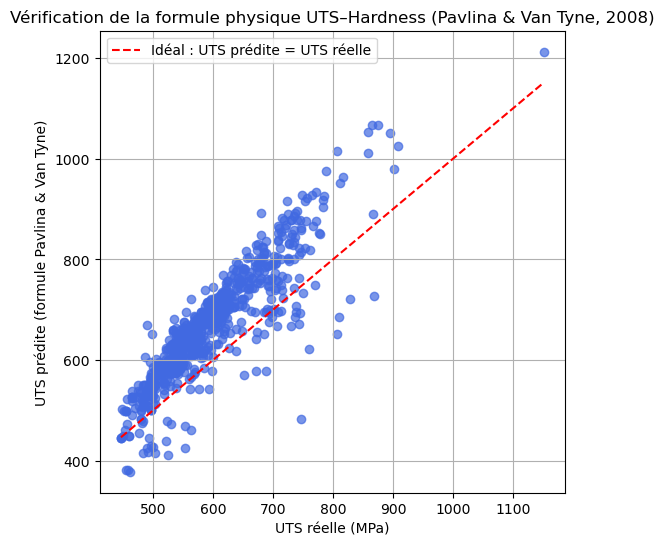

In [6]:

# Graphique de comparaison
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(df['UTS_MPa'],
            df['UTS_pred_phys'], alpha=0.7, color='royalblue')
plt.plot(
    [df['UTS_MPa'].min(), df['UTS_MPa'].max()],
    [df['UTS_MPa'].min(), df['UTS_MPa'].max()],
    'r--', label="Idéal : UTS prédite = UTS réelle"
)
plt.xlabel("UTS réelle (MPa)")
plt.ylabel("UTS prédite (formule Pavlina & Van Tyne)")
plt.title("Vérification de la formule physique UTS–Hardness (Pavlina & Van Tyne, 2008)")
plt.legend()
plt.grid(True)
plt.show()

Le graphique illustre la comparaison entre la résistance à la traction ultime réelle (UTS réelle) et celle prédite par la formule physique de Pavlina & Van Tyne (2008). Chaque point bleu représente un échantillon du jeu de données, tandis que la ligne rouge en pointillés correspond à la situation idéale où la valeur prédite serait égale à la valeur réelle. On observe que la majorité des points se concentrent autour de cette ligne, ce qui montre une corrélation globalement positive entre les deux variables : la formule parvient à suivre la tendance générale de la résistance réelle. Cependant, la dispersion des points, notamment au-delà de 800 MPa, indique que la formule surestime légèrement les valeurs élevées et présente une précision limitée pour certains échantillons. Globalement, la relation reste cohérente, mais avec un écart non négligeable qui suggère que la formule physique ne capture pas parfaitement toutes les variations observées dans les données expérimentales.

Remplacement des valeurs manquantes

In [7]:
# Remplacement des valeurs manquantes d'UTS par les prédictions physiques
df['UUTS_MPa'] = df['UTS_MPa'].fillna(df['UTS_pred_phys'])

print("✅ Valeurs manquantes d'UTS remplacées par les estimations physiques.")


✅ Valeurs manquantes d'UTS remplacées par les estimations physiques.


On vérifie s’il reste des valeurs manquantes dans la colonne UTS.

In [9]:
missing_UTS = df['UTS_MPa'].isnull().sum()
print(f"🔍 Valeurs manquantes restantes dans 'UTS_MPa' : {missing_UTS}")


🔍 Valeurs manquantes restantes dans 'UTS_MPa' : 914


In [10]:
# Sauvegarde du fichier final
df.to_csv("welddb_completed_UTS.csv", index=False)
print("💾 Fichier enregistré : welddb_completed_UTS")


💾 Fichier enregistré : welddb_completed_UTS
